<a href="https://colab.research.google.com/github/cltgoutham/Capstone-3-Coronavirus-Tweet-Sentiment-Analysis/blob/main/Goutham_raj_Classification_ML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CLASSIFICATION PROJECT**    - **CORONAVIRUS TWEET SENTIMENT ANALYSIS**



##### **Project Type**    - **CLASSIFICATION**
##### **Project Name**    - **CORONA VIRUS TWEET SENTIMENT ANALYSIS**
##### **Created By**    -  **GOUTHAM RAJ**



# **Summary of the Project**

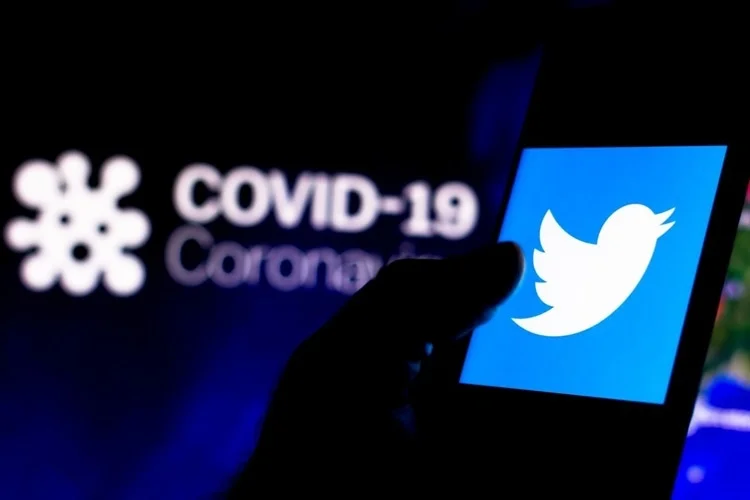

We have been provided with Coronavirus Tweet Sentiment Analysis dataset for the year 2020. The dataset contains 41,157 rows and 6 columns, columns includes UserName, ScreenName, Location, OriginalTweet, TweetAt, Sentiment.

Aim of the project is to build a classification model to predict the sentiment of Covid-19 tweets.

Approach to the project is as follows:-


**NLP Technique is used to build the model.**
1. Data Collection and Cleaning
    - Impoting necessary libraries
    - Checking Duplicates and Null values
    - Data Cleaning
    - Merging the datasets.
2. Exploratory Data Analysis
    - Understanding the data through different visualization techniques.
    - Sentiment Analysis
3. Data Preprocessing
    - Text preprocessing
    - Stopwords removal
    - Tokenization
    - Stemming
    - Vectorization
4. Model Building
    - Used 6 different Classifiction Models.
5. Model Evaluation
6. Conclusion


# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


The objective of this project is to build a classification model to predict the sentiment of COVID-19 tweets.The tweets have been pulled from Twitter and manual tagging has been done then.

The names and usernames have been given codes to avoid any privacy concerns.
You are given the following information:

### The Features of The Dataset:

1. UserName
2. ScreenName
3. Location
4. TweetAt
5. OriginalTweet
6. Sentiment

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Dataset Loading

In [ ]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load Dataset
df =  pd.read_csv('/content/drive/MyDrive/Almabetter/Project 3- Classification/CSV_file/Coronavirus Tweets.csv', encoding = 'latin-1')

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [ ]:
df.tail()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral
41156,44955,89907,i love you so much || he/him,14-04-2020,@TartiiCat Well new/used Rift S are going for ...,Negative


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape
print("Number of Rows :", df.shape[0])
print("Number of Columns :", df.shape[1])

Number of Rows : 41157
Number of Columns : 6


### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

<Axes: >

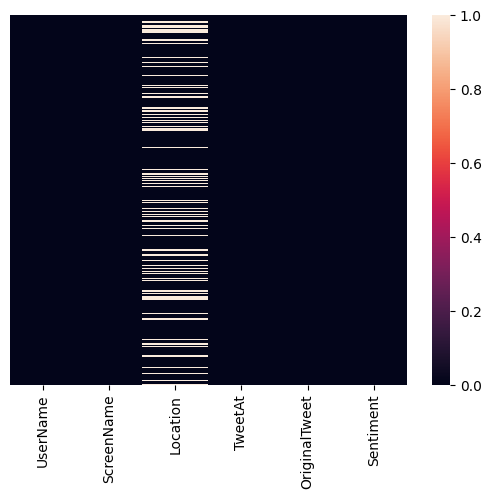

In [ ]:
# Visualizing the missing values
sns.heatmap(df.isnull(), yticklabels=False, color='red',  vmin=0)

### What did you know about your dataset?

1. The Dataset has 41,157 rows and 6 columns.
2. The columns are UserName,ScreenName,Location,TweetAt,OriginalTweet and Sentiment.
3. UserName and ScreenName are numerical columns, TweetAt column has the date at which the tweet was posted. Location, OriginalTweet and Sentiment column has categorical data in it.
4. Only one column "Location" having null values(8,590).
5. There is no duplicate values in the dataset.




## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe(include= 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
UserName,41157.0,NaN,NaN,NaN,24377.0,11881.146851,3799.0,14088.0,24377.0,34666.0,44955.0
ScreenName,41157.0,NaN,NaN,NaN,69329.0,11881.146851,48751.0,59040.0,69329.0,79618.0,89907.0
Location,32567,12220,London,540,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TweetAt,41157,30,20-03-2020,3448,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OriginalTweet,41157,41157,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sentiment,41157,5,Positive,11422,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Variables Description

1. UserName      : Coded Username.
2. ScreenName    : Coded Screen name.
3. Location      : Place at which the tweet was posted.
4. TweetAt       : Timing at which the tweet was posted.
5. OriginalTweet : First tweet in the thread.
6. Sentiment     : Sentiment of the tweet.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
og_location = df['Location'].unique()
og_location

array(['London', 'UK', 'Vagabonds', ..., 'Juba south sudan', 'OHIO',
       'i love you so much || he/him'], dtype=object)

In [ ]:
og_location.shape

(12221,)

In [ ]:
df['Sentiment'].unique()

array(['Neutral', 'Positive', 'Extremely Negative', 'Negative',
       'Extremely Positive'], dtype=object)

In [ ]:
og_tweet = df['OriginalTweet'].unique()
og_tweet.shape

(41157,)

## **3.Exploratory Data Analysis**

###Creating a Copy of the dataset

In [ ]:
df_copy = df.copy()

###1.Sentiment of Tweets

In [ ]:
df_copy.Sentiment.unique()

array(['Neutral', 'Positive', 'Extremely Negative', 'Negative',
       'Extremely Positive'], dtype=object)

In [ ]:
import plotly.express as px
# Understanding the Sentiment through Pie Chart
fig = px.pie(df_copy['Sentiment'].value_counts(),
             labels=df_copy['Sentiment'].value_counts().index,
             values=df_copy['Sentiment'].value_counts().values,
             title='Sentiment Analysis of Tweets',
             names=df_copy['Sentiment'].value_counts().index,
             hole=0.4,
             )
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(width=600, height=600 ,showlegend=False, title_x=0.5)
fig.show()

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:137: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  return args["labels"][column]


##### 1. Why did you pick the specific chart?

 * Pie charts provide a clear visual representation of how different categories contribute to the whole. Each slice represents the proportion of that category with the rest of the pie.
 * Plotly library helps to make the pie chart interactive, as we hover over each slice we can see the number and percentage.

###2.Replacing values in column 'Sentiment'.

In [ ]:
# Replace values in the 'Sentiment' column
df_copy['Sentiment'] = df_copy['Sentiment'].replace({'Extremely Negative': 'Negative', 'Extremely Positive': 'Positive'})

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Bar(
    x=df_copy['Sentiment'].value_counts().index,
    y=df_copy['Sentiment'].value_counts(),
    marker=dict(color='rgb(158,202,225)'),
    text=df_copy['Sentiment'].value_counts(),
    textposition='auto',
)])

fig.update_layout(
    title='Sentiment Analysis of Tweets', title_x=0.5,
    xaxis_title='Tweet Sentiment',
    yaxis_title='Count',
)

fig.show()

##### 1. Why did you pick the specific chart?

* Bar charts are commonly used to visually represent and compare categorical data. They are effective in displaying data that can be divided into distinct categories or groups.
* Plotly library helps to make the bar chart interactive, we can see the height of the bar representing the number by hovering over the bar.

###3.Location of most tweets


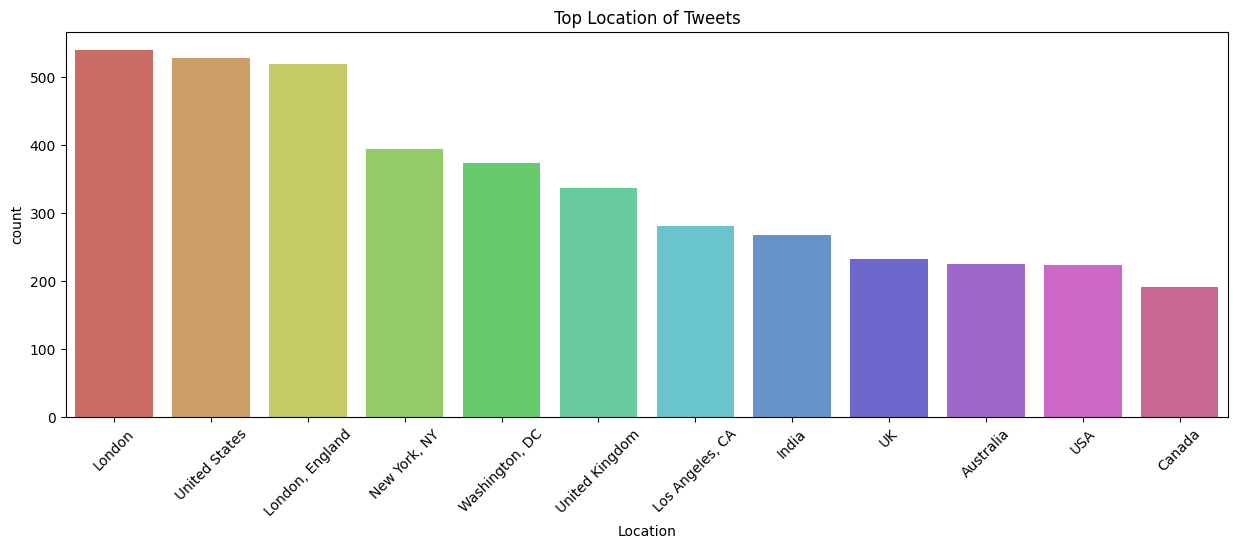

In [ ]:
#Location of Tweets
plt.figure(figsize=(15,5))
sns.countplot(x='Location', data=df_copy, palette= 'hls', order= df_copy['Location'].value_counts()[:12].sort_values(ascending=False).index)

#tilting label in y-axis
plt.title('Top Location of Tweets')
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

* Bar charts are commonly used to visually represent and compare categorical data. They help to understand the frequency of each category.
* The height of the bar represents the frequency of the category.

###4. Month of maximun Tweets

####Date Time

In [ ]:
#Changing the datatype of 'TweetAt' column to datetime
df_copy['TweetAt'] = pd.to_datetime(df_copy['TweetAt'])
df_copy['TweetAt'].dtype

<ipython-input-6-c0cc4032dcdb>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_copy['TweetAt'] = pd.to_datetime(df_copy['TweetAt'])


dtype('<M8[ns]')

In [ ]:
#Creating Month and Day columns
df_copy['Month'] = df_copy['TweetAt'].dt.month
df_copy['Day'] = df_copy['TweetAt'].dt.day

In [ ]:
#Month of maximum tweet
fig = go.Figure(data=[go.Bar(
    x=df_copy['Month'].value_counts().index,
    y=df_copy['Month'].value_counts(),
    marker=dict(color='burlywood'),
    text=df_copy['Month'].value_counts(),
    textposition='auto',
)])

fig.update_layout(
    title='Count of Tweets by Month', title_x=0.5,
    xaxis_title='Month',
    yaxis_title='Count',
)

fig.show()

###5.Day of maximun Tweets

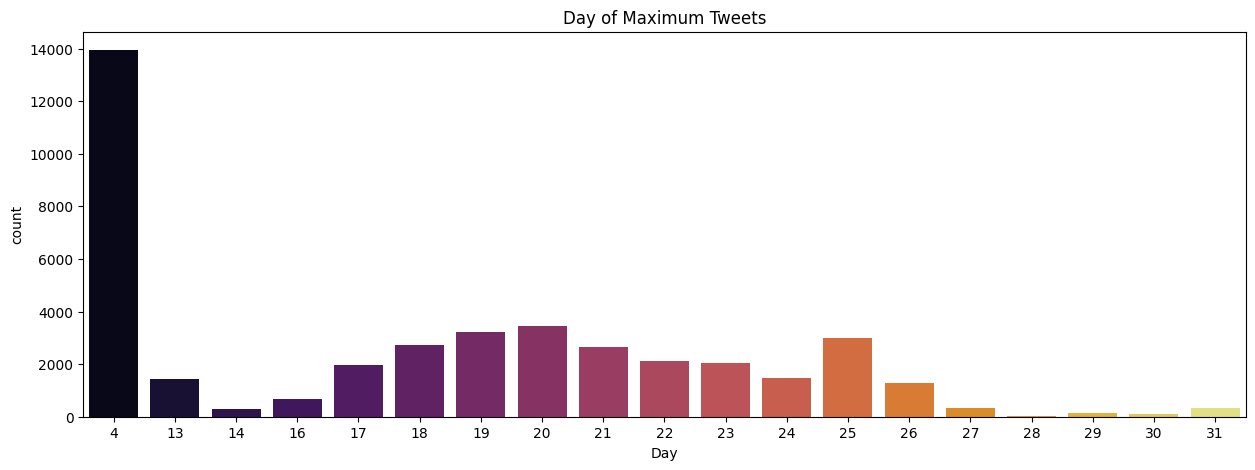

In [ ]:
#Day of maximum tweet
plt.figure(figsize=(15,5))
sns.countplot(x='Day', data=df_copy, palette= 'inferno')
plt.title('Day of Maximum Tweets')
plt.show()

##### 1. Why did you pick the specific chart?

* Bar charts are commonly used to visually represent and compare categorical data. They help to understand the frequency of each category.
* The height of the bar represents the frequency of the category.

###6.Insights from Tweets Column

Creating a new column - Cleaned tweet

In [ ]:
#creating new column
df_copy['cleaned_tweet'] = df_copy['OriginalTweet']
df_copy.loc[:,['OriginalTweet','cleaned_tweet']].sample(5)

,OriginalTweet,cleaned_tweet
20944,5 Tag Uganda police Make sure you don t forget...,5 Tag Uganda police Make sure you don t forget...
24589,A message to all Medical Staff and those in th...,A message to all Medical Staff and those in th...
24061,"Companies are evaluating their businesses, inc...","Companies are evaluating their businesses, inc..."
31253,Surely this is something @OntarioDairy\r\r\nco...,Surely this is something @OntarioDairy\r\r\nco...
19508,#Bahrain Alosra Supermarket (Sar Branch) in Na...,#Bahrain Alosra Supermarket (Sar Branch) in Na...


In [ ]:
# Userhandles Extraction From Tweets
import re

####1.UserHandles

In [ ]:
#Create a function to extract userhandles
def extract_userhandles(text):
  pattern = r"@[A-Za-z0-9]+"
  userhandles = re.findall(pattern, text)
  return userhandles

# Extracting userhandles
userhandles = df_copy['OriginalTweet'].apply(extract_userhandles)
userhandles

0        [@MeNyrbie, @Phil, @Chrisitv]
1                                   []
2                                   []
3                                   []
4                                   []
                     ...              
41152                               []
41153                               []
41154         [@KameronWilds, @kroger]
41155                               []
41156                     [@TartiiCat]
Name: OriginalTweet, Length: 41157, dtype: object

In [ ]:
#Finding top 20 userhandles
data = userhandles.value_counts()[1:20]
#plotting top 20 userhandles
fig = go.Figure(data=[go.Pie(
    labels=data.index,  # User handles
    values=data.values,  # Frequency counts
    hole=0.3,  # Size of the center hole
    marker=dict(colors=['olive', 'gold', 'darkorange', 'salmon', 'lightblue', 'purple', 'pink', 'lime', 'teal', 'gray']),  # Slice colors
)])

fig.update_layout(
    title='Most Appeared Userhandles in Tweets', title_x=0.5,
     width=1000, height=600
)
fig.show()

##### 1. Why did you pick the specific chart?

 * Pie charts provide a clear visual representation of how different categories contribute to the whole. Each slice represents the proportion of that category with the rest of the pie.
 * Plotly library helps to make the pie chart interactive, as we hover over each slice we can see the number and percentage.

####2. Hashtags

In [ ]:
#Function to extract Hashtags from tweets
def extract_hashtags(text):
  pattern = r'#(\w+)'
  hashtags = re.findall(pattern, text)
  return hashtags


# Extracting userhandles
hashtags = df_copy['OriginalTweet'].apply(extract_hashtags)
hashtags

0                                                       []
1                                                       []
2                                                       []
3        [COVID19france, COVID_19, COVID19, coronavirus...
4        [COVID19, coronavirus, CoronavirusFrance, rest...
                               ...                        
41152                                          [NZ, COVID]
41153                                                   []
41154                           [coronavirus, toiletpaper]
41155                  [coronavirus, COVID19, coronavirus]
41156                                                   []
Name: OriginalTweet, Length: 41157, dtype: object

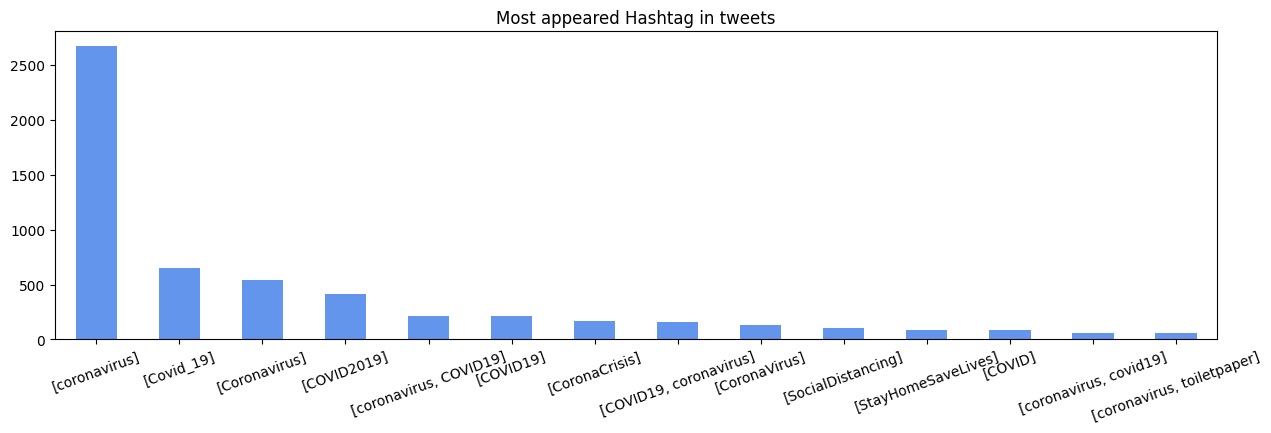

In [ ]:
#Plotting Most appeared Hashtags
plt.figure(figsize= (15,4))
hashtags.value_counts()[1:15].plot(kind='bar',color='cornflowerblue')
plt.title('Most appeared Hashtag in tweets')
plt.xticks(rotation=20)
plt.show()

##### 1. Why did you pick the specific chart?

* Bar charts are commonly used to visually represent and compare categorical data. They help to understand the frequency of each category.
* The height of the bar represents the frequency of the category.

### Remove URLs from tweet

In [ ]:
#remove urls
df_copy['cleaned_tweet'] = df_copy['cleaned_tweet'].apply(lambda x: re.sub(r"http\S+","",x))

In [ ]:
df_copy.loc[:,['OriginalTweet','cleaned_tweet']].head(5)

,OriginalTweet,cleaned_tweet
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,@MeNyrbie @Phil_Gahan @Chrisitv and and
1,advice Talk to your neighbours family to excha...,advice Talk to your neighbours family to excha...
2,Coronavirus Australia: Woolworths to give elde...,Coronavirus Australia: Woolworths to give elde...
3,My food stock is not the only one which is emp...,My food stock is not the only one which is emp...
4,"Me, ready to go at supermarket during the #COV...","Me, ready to go at supermarket during the #COV..."


###7.WordCloud
Word clouds display the most frequently occurring words in a text, with the size of each word indicating its frequency. They provide a quick overview of the main themes or topics in a text.

In [ ]:
from wordcloud import WordCloud

In [ ]:
# Create a WordCloud
text = df_copy['cleaned_tweet'].str.cat(sep="")
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

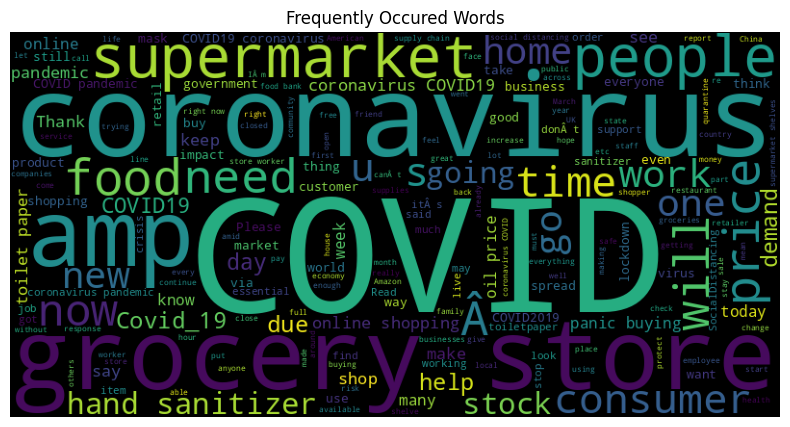

In [ ]:
# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.title('Frequently Occured Words')
plt.imshow(wordcloud, interpolation='antialiased')
plt.axis('off')
plt.show()

##### 1. Why did you pick the specific chart?

* Word clouds are a great way to visualize text data.
* They display words from a given text, with the size of each word proportional to its frequency or importance in the text.
* Most frequently occuring words are displayed in large size representing their importance.

###Words in Positive Tweets.

In [ ]:
positive =df_copy[df_copy['Sentiment']=='Positive']['cleaned_tweet'].str.cat(sep=" ")
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(positive)

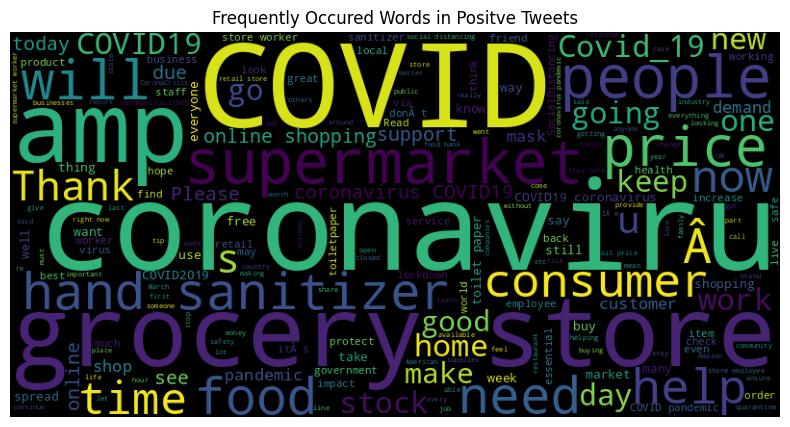

In [ ]:
# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.title('Frequently Occured Words in Positve Tweets')
plt.imshow(wordcloud, interpolation='antialiased')
plt.axis('off')
plt.show()

###Words in Negative Tweets.

In [ ]:
negative =df_copy[df_copy['Sentiment']=='Negative']['cleaned_tweet'].str.cat(sep=" ")
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(negative)

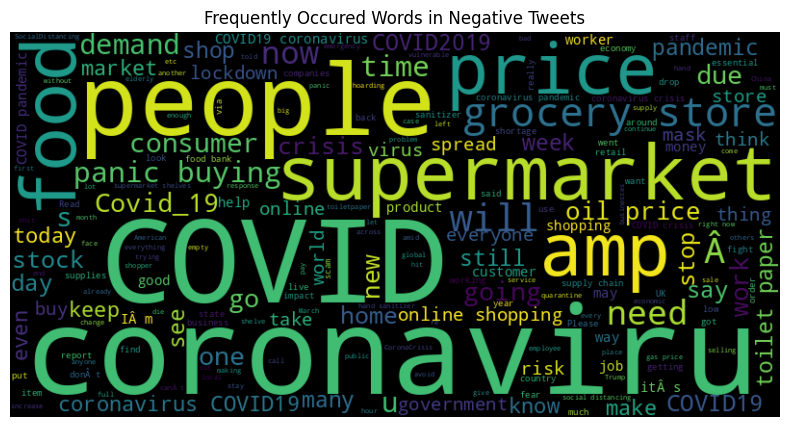

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Frequently Occured Words in Negative Tweets')
plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis('off')
plt.show()

###**EDA CONCLUSION**

* Total of 5 type of sentiments are shown in the data - Positive, Negative, Neutral, Extremely Negative and Extremely Positive.
* Among all the sentiments, Positive sentiment tweets are found to be more with 27.8% of tatal tweets.
* London is the location from where most of the tweets are posted. This may be because UK was one of the most affected country and most active twitter users are from UK.
* March is the month with maximum number of tweets posted. This was the time when the lockdown was announced and the world was in a panic state.
* Maximum number of tweets are posted on day 4th of March.
* Most appeared userhandles are @realDonaldTrump followed by @YouTube.
* Most tagged word or hashtag that appeared in the tweet was #coronavirus and #covid19.
* Word like Covid, Coronavirus, Grocery Store, Supermarket, people etc was the words most repeated in the tweets.


##**4.Data Preprocessing**

### **Contraction of tweets**

 Contractions are shortened forms of words or phrases where one or more letters are omitted and replaced with an apostrophe. For example, "can not" becomes "can't" and "do not" becomes "don't".

In [ ]:
df_copy.loc[:,['OriginalTweet','cleaned_tweet']].head(5)

,OriginalTweet,cleaned_tweet
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,@MeNyrbie @Phil_Gahan @Chrisitv and and
1,advice Talk to your neighbours family to excha...,advice Talk to your neighbours family to excha...
2,Coronavirus Australia: Woolworths to give elde...,Coronavirus Australia: Woolworths to give elde...
3,My food stock is not the only one which is emp...,My food stock is not the only one which is emp...
4,"Me, ready to go at supermarket during the #COV...","Me, ready to go at supermarket during the #COV..."


In [ ]:
!pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 13.1 MB/s eta 0:00:00


In [ ]:
#Expand contractions
import contractions
#Apply contraction on 'cleaned_tweet' colunm
df_copy['cleaned_tweet'] = df_copy['cleaned_tweet'].apply(lambda x: contractions.fix(x))

In [ ]:
df_copy.loc[:,['OriginalTweet','cleaned_tweet']].sample(5)

,OriginalTweet,cleaned_tweet
33586,With many consumers stuck at home due to the t...,With many consumers stuck at home due to the t...
8543,@AmazonUK Very sad that you are allowing this ...,@AmazonUK Very sad that you are allowing this ...
6211,@SenSanders Hallmark is sending retail merchan...,@SenSanders Hallmark is sending retail merchan...
21341,Despite promises by both Amazon Marketplace an...,Despite promises by both Amazon Marketplace an...
22274,The Cuyahoga County Department of Consumer Aff...,The Cuyahoga County Department of Consumer Aff...


###**Remove numbers**

In [ ]:
#remove numbers from the 'cleaned_tweet' column
df_copy['cleaned_tweet'] = df_copy['cleaned_tweet'].apply(lambda x: re.sub(r'\d+','',x))

In [ ]:
df_copy.loc[:,['OriginalTweet','cleaned_tweet']].sample(5)

,OriginalTweet,cleaned_tweet
29923,During COVID 19 ALL prices on my ecopies are 0...,During COVID ALL prices on my ecopies are P...
22661,I started the #COVID19 Health Literacy Project...,I started the #COVID Health Literacy Project t...
16023,Hindustan Unilever going to drop prices of HYG...,Hindustan Unilever going to drop prices of HYG...
20324,@dzuest @wyomingpd So....I work in retail home...,@dzuest @wyomingpd So....I work in retail home...
9026,CONSUMERS: @EU_Consumer and national authoriti...,CONSUMERS: @EU_Consumer and national authoriti...


### **Remove punctuations**

In [ ]:
#function to remove punctuations
def remove_punctuations (text):
  text = re.sub('[^a-zA-Z]', ' ', text)
  return text


In [ ]:
df_copy['cleaned_tweet'] = df_copy['cleaned_tweet'].apply(lambda x: remove_punctuations(x))

In [ ]:
df_copy.loc[:,['OriginalTweet','cleaned_tweet']].sample(5)

,OriginalTweet,cleaned_tweet
28675,"Usually, I break this one out around Halloween...",Usually I break this one out around Halloween...
25217,General drop in the #ElectricityMarkets prices...,General drop in the ElectricityMarkets prices...
26105,We done our part of fighting #Covid_19 by simp...,We done our part of fighting Covid by simply...
19390,Coronavirus: Sanwo-Olu orders closure of all m...,Coronavirus Sanwo Olu orders closure of all m...
82,An open letter to consumer-debt holding organi...,An open letter to consumer debt holding organi...


### **Lower casing**

Converting words into lower case so case sensitivity can be treated and word redundancy can be removed.

In [ ]:
#Converting text data into Lowercase
df_copy['cleaned_tweet'] = df_copy['cleaned_tweet'].apply(lambda x: x.lower())

In [ ]:
df_copy.loc[:,['OriginalTweet','cleaned_tweet']].sample(5)

,OriginalTweet,cleaned_tweet
17605,Supply &amp; demand will dictate prices but pr...,supply amp demand will dictate prices but pr...
12975,?33.50/liter na lang unleaded gas sa amin. San...,liter na lang unleaded gas sa amin sana ma...
93,"Pretty sure within a week or two, supermarket ...",pretty sure within a week or two supermarket ...
34909,"Dont spam us with false assurances ""Dear Consu...",do not spam us with false assurances dear con...
13833,COVID-19 | Shopping during a pandemic | #Polly...,covid shopping during a pandemic pollybi...


### **Stopwords Removal**
Stop words are commonly used words in a language that do not carry significant meaning, so by removing them we can reduce the noise in the data.

In [ ]:
!pip install nltk

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#remove stopwords and white spaces
df_copy['cleaned_tweet'] = df_copy['cleaned_tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords.words('english'))]))

In [ ]:
df_copy.loc[:,['OriginalTweet','cleaned_tweet']].sample(5)

,OriginalTweet,cleaned_tweet
21808,When I stock up on food \r\r\n??????????? \r\r...,stock food covid cov covid corona
35862,An activist group which filed a consumer prote...,activist group filed consumer protection emoti...
19407,Day 4ish of quarantine. While IÂve been comfo...,day ish quarantine comfortably practicing soci...
19853,Just been informed today The Whitstable Harbou...,informed today whitstable harbour restuarant e...
5338,"Everybody panic! It has begun, the monkeys are...",everybody panic begun monkeys taking soon surv...


###**Tokenization**
This process breaks down text into smaller units called tokens. Tokenization helps in standardizing and cleaning text data before further analysis.

In [ ]:
#tokenization
from nltk.tokenize import word_tokenize
nltk.download('punkt')

df_copy['cleaned_tweet'] = df_copy['cleaned_tweet'].apply(lambda x: word_tokenize(x))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
df_copy.loc[:,['OriginalTweet','cleaned_tweet']].sample(5)

,OriginalTweet,cleaned_tweet
33315,"CaniBrands Donates Funds, Lowers Prices and La...","[canibrands, donates, funds, lowers, prices, l..."
31103,Share Profits From Low Crude Oil Prices With P...,"[share, profits, low, crude, oil, prices, peop..."
6236,"Armageddon is here, but when told not to panic...","[armageddon, told, panic, first, thing, panic,..."
1268,"After being met with temperature testing, glov...","[met, temperature, testing, gloves, face, mask..."
27816,#Lebanese nationals stranded abroad due to the...,"[lebanese, nationals, stranded, abroad, due, c..."


###**Stemming**

Stemming is used here for normalization of words.

In [ ]:
#stemming
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
stemmer.stem('running')

'run'

In [ ]:
#Function to stem words in the 'cleaned_tweet' column
def stemming(text):
  text = [stemmer.stem(word) for word in text]
  return (' '.join(text))

df_copy['cleaned_tweet'] = df_copy['cleaned_tweet'].apply(stemming)

In [ ]:
df_copy.loc[:,['OriginalTweet','cleaned_tweet']].head()

,OriginalTweet,cleaned_tweet
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,menyrbi phil gahan chrisitv
1,advice Talk to your neighbours family to excha...,advic talk neighbour famili exchang phone numb...
2,Coronavirus Australia: Woolworths to give elde...,coronaviru australia woolworth give elderli di...
3,My food stock is not the only one which is emp...,food stock one empti pleas panic enough food e...
4,"Me, ready to go at supermarket during the #COV...",readi go supermarket covid outbreak paranoid f...


##**5.MODEL TRAINING**

In [ ]:
#Independent and Dependent Variables
X = df_copy['cleaned_tweet']
Y = df_copy['Sentiment']

**Train Test Split**

In [ ]:
#Splitting the Dataset into Train and Test sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.25, random_state = 0)

**Vectorization**

In [ ]:
#Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()

In [ ]:
#pipeline
from sklearn.pipeline import Pipeline

In [ ]:
#Evaluate the model
from sklearn.metrics import *

###**1. Logistic Regression**

In [ ]:
#logistic Regression
from sklearn.linear_model import LogisticRegression
LRM = LogisticRegression()

In [ ]:
model1 = Pipeline([('vectorizer', vec),('model', LRM)])
model1.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('model', LogisticRegression())])

In [ ]:
#model prediction
Y_pred = model1.predict(X_test)
Y_pred

array(['Neutral', 'Negative', 'Negative', ..., 'Positive', 'Positive',
       'Positive'], dtype=object)

PERFORMANCE EVALUATION

In [ ]:
print('Accuracy Score:', accuracy_score(Y_test, Y_pred))
print('Precision Score:', precision_score(Y_test, Y_pred, average = 'weighted'))
print('Recall Score:', recall_score(Y_test, Y_pred, average = 'weighted'))
print('F1 Score:', f1_score(Y_test, Y_pred, average = 'weighted'))

Accuracy Score: 0.7956268221574344
Precision Score: 0.793971702254424
Recall Score: 0.7956268221574344
F1 Score: 0.7930767632143401


###**1.1. Logistic Regression with Hyperparameter Tuning**

In [ ]:

from sklearn.model_selection import GridSearchCV
LR = LogisticRegression()
#parameters to give for LR
parameter = dict(penalty = ['l1', 'l2'], C = [0.001, 0.01, 0.1, 1, 10, 100], solver = ['newton-cg', 'lbfgs', 'liblinear'])

#Hyper parameter tuning
LR_GCV = GridSearchCV(LR, parameter, cv = 10, n_jobs = -1)

In [ ]:
#fitting the model
model1_1 = Pipeline([('vectorizer', vec), ('model', LR_GCV)])
model1_1.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
120 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Sol

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('model',
                 GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
                              param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                                          'penalty': ['l1', 'l2'],
                                          'solver': ['newton-cg', 'lbfgs',
                                                     'liblinear']}))])

In [ ]:
#model prediction
Y_pred_LR_GCV = model1_1.predict(X_test)
Y_pred_LR_GCV

array(['Neutral', 'Negative', 'Negative', ..., 'Positive', 'Positive',
       'Positive'], dtype=object)

PERFORMANCE EVALUATION

In [ ]:
print('Accuracy Score:', accuracy_score(Y_test, Y_pred_LR_GCV))
print('Precision Score:', precision_score(Y_test, Y_pred_LR_GCV, average = 'weighted'))
print('Recall Score:', recall_score(Y_test, Y_pred_LR_GCV, average = 'weighted'))
print('F1 Score:', f1_score(Y_test, Y_pred_LR_GCV, average = 'weighted'))

Accuracy Score: 0.8282798833819242
Precision Score: 0.8280395724638874
Recall Score: 0.8123719521775435
F1 Score: 0.8143844491746487


###**2.Support Vector Machine**

In [ ]:
#support vector machine classifier
from sklearn.svm import SVC
SVM = SVC(kernel = 'linear')

In [ ]:
model2 =Pipeline([('vectorizer', vec),('model', SVM)])
model2.fit(X_train, Y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('model', SVC(kernel='linear'))])

In [ ]:
#model prediction
Y_pred_SVM = model2.predict(X_test)
Y_pred_SVM

array(['Neutral', 'Neutral', 'Negative', ..., 'Negative', 'Positive',
       'Positive'], dtype=object)

PERFORMANCE EVALUATION

In [ ]:
#Evaluate the model
print('Accuracy Score:', accuracy_score(Y_test, Y_pred_SVM))
print('Precision Score:', precision_score(Y_test, Y_pred_SVM, average = 'weighted'))
print('Recall Score:', recall_score(Y_test, Y_pred_SVM, average = 'weighted'))
print('F1 Score:', f1_score(Y_test, Y_pred_SVM, average = 'weighted'))

Accuracy Score: 0.8013605442176871
Precision Score: 0.7999289626586005
Recall Score: 0.7753967176039708
F1 Score: 0.781479272482838


###**3.Decision Tree Classifier**

In [ ]:
#decision tree classifier
from sklearn.tree import DecisionTreeClassifier


In [ ]:
DT = DecisionTreeClassifier()

In [ ]:
model3 = Pipeline([('vectorizer', vec),('model', DT)])
model3.fit(X_train, Y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('model', DecisionTreeClassifier())])

In [ ]:
#predictions
Y_pred_DT = model3.predict(X_test)
Y_pred_DT

array(['Neutral', 'Negative', 'Positive', ..., 'Positive', 'Negative',
       'Positive'], dtype=object)

PERFORMANCE EVALUATION

In [ ]:
print('Accuracy Score:', accuracy_score(Y_test, Y_pred_DT))
print('Precision Score:', precision_score(Y_test, Y_pred_DT, average = 'weighted'))
print('Recall Score:', recall_score(Y_test, Y_pred_DT, average = 'weighted'))
print('F1 Score:', f1_score(Y_test, Y_pred_DT, average = 'weighted'))

Accuracy Score: 0.645092322643343
Precision Score: 0.6493550138408974
Recall Score: 0.645092322643343
F1 Score: 0.6465524191552026


###**4.Ada Boosting Classifier**

In [ ]:
#ada boosting
from sklearn.ensemble import AdaBoostClassifier
AB = AdaBoostClassifier(n_estimators=100, random_state=0)

In [ ]:
model4 = Pipeline([('vectorizer', vec), ('model', AB)])
model4.fit(X_train, Y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('model',
                 AdaBoostClassifier(n_estimators=100, random_state=0))])

In [ ]:
#predictions
Y_pred_AB = model4.predict(X_test)

PERFORMANCE EVALUATION

In [ ]:
print('Accuracy Score:', accuracy_score(Y_test, Y_pred_AB))
print('Precision Score:', precision_score(Y_test, Y_pred_AB, average = 'weighted'))
print('Recall Score:', recall_score(Y_test, Y_pred_AB, average = 'weighted'))
print('F1 Score:', f1_score(Y_test, Y_pred_AB, average = 'weighted'))

Accuracy Score: 0.7014577259475219
Precision Score: 0.7290559585190214
Recall Score: 0.7014577259475219
F1 Score: 0.7077508436501464


###**5.Random Forest Classifier**

In [ ]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs = -1)

In [ ]:
model5 = Pipeline([('vectorizer', vec), ('model', RF)])
model5.fit(X_train, Y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('model', RandomForestClassifier(n_jobs=-1, random_state=0))])

In [ ]:
#Predictions
Y_pred_RF = model5.predict(X_test)
Y_pred_RF

array(['Neutral', 'Positive', 'Positive', ..., 'Positive', 'Neutral',
       'Positive'], dtype=object)

PERFORMANCE EVALUATION

In [ ]:
print('Accuracy Score:', accuracy_score(Y_test, Y_pred_RF))
print('Precision Score:', precision_score(Y_test, Y_pred_RF, average = 'weighted'))
print('Recall Score:', recall_score(Y_test, Y_pred_RF, average = 'weighted'))
print('F1 Score:', f1_score(Y_test, Y_pred_RF, average = 'weighted'))

Accuracy Score: 0.7472303206997084
Precision Score: 0.7472533995174641
Recall Score: 0.7472303206997084
F1 Score: 0.7457518712856651


###**6.Gradient Boosting Classifier**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
XGB = GradientBoostingClassifier( n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0 )

In [ ]:
model6 = Pipeline([('vectorizer', vec),('model', XGB)])
model6.fit(X_train, Y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('model', GradientBoostingClassifier(random_state=0))])

In [ ]:
#predictions
Y_pred_XGB = model6.predict(X_test)

PERFORMANCE EVALUATION

In [ ]:
print('Accuracy Score:', accuracy_score(Y_test, Y_pred_XGB))
print('Precision Score:', precision_score(Y_test, Y_pred_XGB, average = 'weighted'))
print('Recall Score:', recall_score(Y_test, Y_pred_XGB, average = 'weighted'))
print('F1 Score:', f1_score(Y_test, Y_pred_XGB, average = 'weighted'))

Accuracy Score: 0.679980563654033
Precision Score: 0.6820779207074013
Recall Score: 0.679980563654033
F1 Score: 0.6705539659254058


###**Comparing scores of all the models**

Comparing the performance of all the Classification models.

In [ ]:
model_scores=[{'model' : 'LR Classifier', 'F1 Score' : 0.7930 },
              {'model' : 'LR_hyp', 'F1 Score' : 0.8143 },
              {'model' : 'SVM classifier', 'F1 Score' : 0.7814 },
              {'model' : 'DT classifier', 'F1 Score' : 0.6465 },
              {'model' : 'RF classifier', 'F1 Score' : 0.7457 },
              {'model' : 'AdaBoost', 'F1 Score' : 0.7077 },
              {'model' : 'GradientBoost', 'F1 Score' : 0.6705 } ]

# function to create comparison table
def create_comparison_table(model_scores):
    comparison_table = pd.DataFrame(model_scores)
    return comparison_table

# create comparison table
comparison_table = create_comparison_table(model_scores)
comparison_table

,model,F1 Score
0,LR Classifier,0.7930
1,LR_hyp,0.8143
2,SVM classifier,0.7814
3,DT classifier,0.6465
4,RF classifier,0.7457
5,AdaBoost,0.7077
6,GradientBoost,0.6705


* We can see that Linear Regression model with hyperparameter tuning gives the best performance among all the models.

###**Testing the model**

In [ ]:
#Testing the sentiment of New Tweets
Tweet = ['he is out of station', 'my father was sick',
         'vaccination is good to prevent covid',
         'if you have fever, you better take medicine',
        'eat nutritious food for a healthy life',
         'take care of your health']
result = model1_1.predict(Tweet)
print(result)

['Neutral' 'Negative' 'Positive' 'Positive' 'Neutral' 'Positive']


##**6.CONCLUSION**

* Data preperation for the model was done through a series of steps.
* First we removed the Numbers, Punctuations and Stopwords from the data and then Tokenization, Stemming and Vectorization was done. Then we splitted the data into dependent and independent variables.
* We used the TF-IDF vectorizer to convert the tweets into numerical values.
* Models we used in this project are : Logistic Regression, SVM, Decision Tree, Random Forest, Ada Boosting and Gradient Boosting.
* We can see that linear regression model with hyperparameter tuning gave the best performance among all the models.
* For evaluation we used Accuracy, Precision, Recall and F1 score, among these model with the best F1 score is taken as the final model.
